In [ ]:
# 라이브러리 설치 코드
!pip install -U finance-datareader
!pip install pyportfolioopt
!pip install pyfolio

In [75]:
import time
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm 
import requests
from io import StringIO
import seaborn as sns; sns.set() 
from matplotlib.dates import YearLocator, MonthLocator 
from matplotlib import cm 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
import pyfolio as pf
import FinanceDataReader as fdr
import pypfopt
from pypfopt import risk_models, expected_returns
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation

In [76]:
#@title
#모델포트폴리오 선정

stock_basket2014=['016170',
 '078340',
 '030190',
 '086900',
 '035420',
 '168330',
 '090430',
 '049960',
 '123420',
 '041830',
 '016100',
 '114090',
 '083450',
 '098120',
 '123860',
 '170030',
 '018120',
 '033560',
 '028150',
 '120030',
 '111770',
 '003220',
 '093320',
 '036570',
 '058470',
 '098460',
 '093920',
 '149950',
 '005930',
 '009240',
 '016670',
 '025770',
 '041460',
 '080420',
 '051600',
 '018310',
 '126600',
 '092130',
 '130580',
 '086960',
 '115310',
 '049520',
 '042110',
 '030520',
 '086450',
 '048430',
 '039440',
 '003670',
 '030530',
 '095610',
 '092040',
 '084110',
 '100120',
 '122870',
 '012750',
 '099190',
 '080160',
 '068930',
 '093050',
 '090850',
 '012790',
 '051360',
 '033270',
 '013030',
 '011040',
 '051900',
 '104830',
 '018880',
 '041140',
 '002960',
 '002790',
 '122450',
 '072870',
 '034950',
 '060250',
 '039130',
 '053610',
 '058860',
 '063570',
 '123750',
 '075180',
 '029460',
 '069510',
 '084870',
 '134380',
 '007310',
 '036190',
 '123410',
 '064480',
 '000270',
 '081580',
 '054940',
 '000250',
 '033920',
 '009970',
 '015230',
 '021240',
 '170920',
 '085810',
 '126700']

stock_basket2015=['069080',
 '016170',
 '030190',
 '041830',
 '078340',
 '090430',
 '009240',
 '035420',
 '049960',
 '051600',
 '033780',
 '021240',
 '002960',
 '084110',
 '032620',
 '192440',
 '100120',
 '086900',
 '018120',
 '033560',
 '029460',
 '108320',
 '025770',
 '027410',
 '092130',
 '098460',
 '086450',
 '171120',
 '120030',
 '130580',
 '039340',
 '058470',
 '041920',
 '092730',
 '064760',
 '039440',
 '030520',
 '053210',
 '126600',
 '041140',
 '093320',
 '013120',
 '143240',
 '093920',
 '051900',
 '016100',
 '102710',
 '043200',
 '018260',
 '002790',
 '036190',
 '170030',
 '089600',
 '200670',
 '067160',
 '009970',
 '131030',
 '123420',
 '036830',
 '000660',
 '005500',
 '078520',
 '114090',
 '081580',
 '041460',
 '042110',
 '018310',
 '192250',
 '078070',
 '053300',
 '079940',
 '161890',
 '122450',
 '111770',
 '078140',
 '013030',
 '035250',
 '123700',
 '083310',
 '196490',
 '003650',
 '119610',
 '101330',
 '154040',
 '093190',
 '005930',
 '011170',
 '086960',
 '099190',
 '033270',
 '003220',
 '039980',
 '034950',
 '075180',
 '134380',
 '029960',
 '104830',
 '036570',
 '000250',
 '007310']

stock_basket2016=['030190',
 '016170',
 '067160',
 '035420',
 '009240',
 '100120',
 '041830',
 '090430',
 '192440',
 '067280',
 '078150',
 '049960',
 '143240',
 '092730',
 '053210',
 '098460',
 '078340',
 '064760',
 '086450',
 '114090',
 '088130',
 '078520',
 '003220',
 '092130',
 '054450',
 '041920',
 '200130',
 '042700',
 '025770',
 '089140',
 '161000',
 '043610',
 '033780',
 '011170',
 '018310',
 '069080',
 '079650',
 '003350',
 '021240',
 '005500',
 '171120',
 '005930',
 '161890',
 '058470',
 '084370',
 '130580',
 '027410',
 '006650',
 '145020',
 '041460',
 '002790',
 '012510',
 '051900',
 '018120',
 '029460',
 '079940',
 '131030',
 '029960',
 '092070',
 '120030',
 '119610',
 '002960',
 '115310',
 '033560',
 '089590',
 '102710',
 '016090',
 '078140',
 '155650',
 '101330',
 '002360',
 '206640',
 '170030',
 '025540',
 '192250',
 '045390',
 '053690',
 '065510',
 '002840',
 '192080',
 '028150',
 '123420',
 '039340',
 '023910',
 '034950',
 '035900',
 '005710',
 '039440',
 '039840',
 '031980',
 '094360',
 '036690',
 '147830',
 '214180',
 '036190',
 '080160',
 '126600',
 '012750',
 '123100',
 '052330']

stock_basket2017=['240810',
 '007700',
 '215000',
 '083310',
 '033290',
 '016170',
 '067160',
 '002960',
 '030190',
 '119860',
 '086390',
 '042510',
 '036570',
 '243070',
 '092730',
 '049950',
 '036200',
 '064760',
 '126700',
 '083450',
 '035900',
 '067280',
 '192440',
 '090470',
 '039010',
 '095610',
 '123100',
 '005930',
 '041830',
 '200130',
 '130580',
 '214180',
 '000660',
 '086450',
 '023890',
 '069260',
 '035420',
 '012750',
 '092130',
 '049960',
 '031980',
 '045660',
 '078340',
 '131030',
 '029960',
 '011170',
 '108230',
 '033270',
 '220630',
 '051900',
 '080160',
 '058470',
 '051600',
 '161000',
 '025770',
 '225330',
 '144960',
 '098460',
 '143240',
 '005500',
 '056190',
 '012510',
 '023910',
 '068930',
 '230360',
 '100120',
 '108320',
 '034950',
 '079940',
 '009240',
 '046110',
 '160980',
 '213420',
 '122990',
 '120030',
 '178920',
 '119610',
 '001820',
 '092070',
 '078150',
 '018120',
 '102710',
 '114090',
 '053210',
 '000250',
 '059090',
 '145020',
 '214430',
 '051910',
 '066620',
 '006650',
 '089590',
 '149950',
 '122450',
 '011370',
 '185750',
 '207760',
 '069080',
 '048910',
 '028150']

stock_basket2018=['030190',
 '086390',
 '240810',
 '042510',
 '002960',
 '067280',
 '263750',
 '119860',
 '033290',
 '239610',
 '092730',
 '243070',
 '130580',
 '067160',
 '029960',
 '029460',
 '215200',
 '264450',
 '230360',
 '001820',
 '000660',
 '005930',
 '007700',
 '064760',
 '255440',
 '036200',
 '051900',
 '232140',
 '079940',
 '192440',
 '093320',
 '049960',
 '069080',
 '041830',
 '002700',
 '031980',
 '004870',
 '092130',
 '039010',
 '241790',
 '083310',
 '086450',
 '035900',
 '143240',
 '241770',
 '003220',
 '098460',
 '100120',
 '225190',
 '058470',
 '126700',
 '054450',
 '218410',
 '272290',
 '039340',
 '200130',
 '023910',
 '005870',
 '166090',
 '033270',
 '078340',
 '138580',
 '013120',
 '069510',
 '036000',
 '036830',
 '036190',
 '045100',
 '248170',
 '068930',
 '094820',
 '023890',
 '095610',
 '263720',
 '268280',
 '104830',
 '214180',
 '102710',
 '012750',
 '220630',
 '034950',
 '035510',
 '053800',
 '074600',
 '035420',
 '140860',
 '131030',
 '012510',
 '141000',
 '031310',
 '044340',
 '036010',
 '005500',
 '236200',
 '010240',
 '018120',
 '114090',
 '122990',
 '003000',
 '096240']

stock_basket2019=['036120',
 '119860',
 '007700',
 '270870',
 '239610',
 '030190',
 '207760',
 '068930',
 '130580',
 '083450',
 '143240',
 '092730',
 '263750',
 '067160',
 '051900',
 '267790',
 '243070',
 '033290',
 '041830',
 '200130',
 '192440',
 '034950',
 '079940',
 '036570',
 '018250',
 '236200',
 '215200',
 '248170',
 '214180',
 '102120',
 '138580',
 '093320',
 '264660',
 '035900',
 '053610',
 '086450',
 '044340',
 '230360',
 '220630',
 '214150',
 '140860',
 '064760',
 '002960',
 '003220',
 '092130',
 '036830',
 '225190',
 '122310',
 '285490',
 '067280',
 '100120',
 '102710',
 '036200',
 '267980',
 '096530',
 '047310',
 '018260',
 '003230',
 '058470',
 '264450',
 '036670',
 '131030',
 '263720',
 '002410',
 '009420',
 '073490',
 '054670',
 '022220',
 '268280',
 '006620',
 '054450',
 '069510',
 '012750',
 '099320',
 '036810',
 '134380',
 '082920',
 '049070',
 '226340',
 '114090',
 '284740',
 '130660',
 '039340',
 '185750',
 '029460',
 '068330',
 '040420',
 '215000',
 '293480',
 '065710',
 '290740',
 '086390',
 '271560',
 '081660',
 '097520',
 '001880',
 '078340',
 '089970',
 '043150',
 '006580']

In [77]:
##가격데이터 호출  15분정도 걸림  불러올때만 사용하고 그외에는 주석처리할것


# stock_dict_total2014 = {}  # 종가 데이터를 저장할 딕셔너리
# stock_dict_total2015 = {}
# stock_dict_total2016 = {}
# stock_dict_total2017 = {}
# stock_dict_total2018 = {}
# stock_dict_total2019 = {}
# benchmark_list=["KS11","KQ11"]
# benchmark2014={}
# benchmark2015={}
# benchmark2016={}
# benchmark2017={}
# benchmark2018={}
# benchmark2019={}


# #2014
# for stock_code in stock_basket2014:
#     df_total_close2014=fdr.DataReader(stock_code, '2011-01-01', '2014-12-31')['Close']    
#     stock_dict_total2014[stock_code] = df_total_close2014   
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2014 = pd.DataFrame(stock_dict_total2014)
# for i in benchmark_list:
#   benchmark2014[i]=fdr.DataReader(i, '2014-01-01', '2014-12-31')['Close']
# df_benchmark2014=pd.DataFrame(benchmark2014)
# df_benchmark2014= df_benchmark2014.dropna(axis=0)
# end2013='2013-12-30'
# start2014=df_benchmark2014.index[0]
# end2014=df_benchmark2014.index[-1]

# #2015
# for stock_code in stock_basket2015:
#     df_total_close2015=fdr.DataReader(stock_code, '2012-01-01', '2015-12-31')['Close']    
#     stock_dict_total2015[stock_code] = df_total_close2015   
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2015 = pd.DataFrame(stock_dict_total2015)
# for i in benchmark_list:
#   benchmark2015[i]=fdr.DataReader(i, '2015-01-01', '2015-12-31')['Close']
# df_benchmark2015=pd.DataFrame(benchmark2015)
# df_benchmark2015= df_benchmark2015.dropna(axis=0)
# start2015=df_benchmark2015.index[0]
# end2015=df_benchmark2015.index[-1]



# #2016
# for stock_code in stock_basket2016:
#     df_total_close2016=fdr.DataReader(stock_code, '2013-01-01', '2016-12-31')['Close']    
#     stock_dict_total2016[stock_code] = df_total_close2016   
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2016 = pd.DataFrame(stock_dict_total2016)
# for i in benchmark_list:
#   benchmark2016[i]=fdr.DataReader(i, '2016-01-01', '2016-12-31')['Close']
# df_benchmark2016=pd.DataFrame(benchmark2016)
# df_benchmark2016= df_benchmark2016.dropna(axis=0)
# start2016=df_benchmark2016.index[0]
# end2016=df_benchmark2016.index[-1]

# #2017
# for stock_code in stock_basket2017:
#     df_total_close2017=fdr.DataReader(stock_code, '2014-01-01', '2017-12-31')['Close']    
#     stock_dict_total2017[stock_code] = df_total_close2017   
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2017 = pd.DataFrame(stock_dict_total2017)
# for i in benchmark_list:
#   benchmark2017[i]=fdr.DataReader(i, '2017-01-01', '2017-12-31')['Close']
# df_benchmark2017=pd.DataFrame(benchmark2017)
# df_benchmark2017= df_benchmark2017.dropna(axis=0)
# start2017=df_benchmark2017.index[0]
# end2017=df_benchmark2017.index[-1]

# #2018
# for stock_code in stock_basket2018:
#     df_total_close2018=fdr.DataReader(stock_code, '2015-01-01', '2018-12-31')['Close']    
#     stock_dict_total2018[stock_code] = df_total_close2018   
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2018 = pd.DataFrame(stock_dict_total2018)
# for i in benchmark_list:
#   benchmark2018[i]=fdr.DataReader(i, '2018-01-01', '2018-12-31')['Close']
# df_benchmark2018=pd.DataFrame(benchmark2018)
# df_benchmark2018= df_benchmark2018.dropna(axis=0)
# start2018=df_benchmark2018.index[0]
# end2018=df_benchmark2018.index[-1]

# #2019
# for stock_code in stock_basket2019:
#     df_total_close2019=fdr.DataReader(stock_code, '2016-01-01', '2019-12-31')['Close']    
#     stock_dict_total2019[stock_code] = df_total_close2019
# # 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
# stock_total2019 = pd.DataFrame(stock_dict_total2019)
# for i in benchmark_list:
#   benchmark2019[i]=fdr.DataReader(i, '2019-01-01', '2019-12-31')['Close']
# df_benchmark2019=pd.DataFrame(benchmark2019)
# df_benchmark2019= df_benchmark2019.dropna(axis=0)
# start2019=df_benchmark2019.index[0]
# end2019=df_benchmark2019.index[-1]




In [78]:
#2014
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2014.loc[:end2013])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2014.loc[:end2013]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

# Get sorted cleaned weights
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)

# Select top stocks by weight
top_stocks = [w[0] for w in basket_sorted_weights[:25]]

# Filter df_close_basket for top stocks
df_top2014 = stock_total2014[top_stocks].dropna()

mu = expected_returns.mean_historical_return(df_top2014)
S = risk_models.CovarianceShrinkage(df_top2014).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도 제외
ef.add_constraint(lambda x: sum(x) == 1)  # Sum of weights must be 1
ef.add_constraint(lambda x: x >= 0)  # Weights must be non-negative
ef.add_constraint(lambda x: x <= 1)  # Weights must be non-greater than 1

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()


# Get latest prices for top stocks
latest_prices = df_top2014.loc[end2013]

# Use the Discrete Allocation module to compute the number of shares to buy
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2014, leftover2014 = da.greedy_portfolio()   #     lp_portfolio()

# Print the allocation summary
print("2014 Allocation:")
for ticker, shares in allocation2014.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2014))

allocation2014  #딕셔너리
allocation_df2014 = pd.DataFrame.from_dict(allocation2014, orient='index').T

print(allocation_df2014)


2014 Allocation:
036190: 55 shares
090430: 15 shares
011040: 202 shares
069510: 217 shares
009240: 23 shares
123420: 78 shares
002790: 15 shares
018120: 16 shares
123410: 41 shares
168330: 3 shares
123750: 26 shares
092130: 11 shares
Leftover: KRW2557.00
   036190  090430  011040  069510  009240  123420  002790  018120  123410  \
0      55      15     202     217      23      78      15      16      41   

   168330  123750  092130  
0       3      26      11  


In [79]:
#2015
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#투자시점 이전 역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2015.loc[:end2014])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2015.loc[:end2014]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

#비중순으로 정렬
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)

#상위 25개 종목 선정
top_stocks = [w[0] for w in basket_sorted_weights[:25]]

#결측값 있는 데이터 제거
df_top2015 = stock_total2015[top_stocks].dropna()
#다시 포트폴리오 편성
mu = expected_returns.mean_historical_return(df_top2015)
S = risk_models.CovarianceShrinkage(df_top2015).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도 제외
ef.add_constraint(lambda x: sum(x) == 1)  
ef.add_constraint(lambda x: x >= 0)  
ef.add_constraint(lambda x: x <= 1) 

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()




#투자시점 이전 최근가격
latest_prices = df_top2015.loc[end2014]

#자산배분
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2015, leftover2015 = da.greedy_portfolio()

#종목과 보유수량 테이블 생성
print("2015 Allocation:")
for ticker, shares in allocation2015.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2015))
allocation2015 
allocation_df2015 = pd.DataFrame.from_dict(allocation2015, orient='index').T

print(allocation_df2015)


2015 Allocation:
196490: 708 shares
027410: 116 shares
033780: 21 shares
083310: 307 shares
041460: 200 shares
041830: 20 shares
032620: 106 shares
Leftover: KRW73342.00
   196490  027410  033780  083310  041460  041830  032620
0     708     116      21     307     200      20     106


In [80]:
#2016
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#투자시점 이전 역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2016.loc[:end2015])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2016.loc[:end2015]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

#비중순으로 정렬
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)

#상위 25개 종목 선정
top_stocks = [w[0] for w in basket_sorted_weights[:25]]

#결측값 있는 데이터 제거
df_top2016 = stock_total2016[top_stocks].dropna()
#다시 포트폴리오 편성
mu = expected_returns.mean_historical_return(df_top2016)
S = risk_models.CovarianceShrinkage(df_top2016).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도 제외
ef.add_constraint(lambda x: sum(x) == 1)  # Sum of weights must be 1
ef.add_constraint(lambda x: x >= 0)  # Weights must be non-negative
ef.add_constraint(lambda x: x <= 1)  # Weights must be non-greater than 1

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()




#투자시점 이전 최근가격
latest_prices = df_top2016.loc[end2015]

#자산배분
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2016, leftover2016 = da.greedy_portfolio()

#종목과 보유수량 테이블 생성
print("2016 Allocation:")
for ticker, shares in allocation2016.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2016))

allocation2016  
allocation_df2016 = pd.DataFrame.from_dict(allocation2016, orient='index').T

print(allocation_df2016)


2016 Allocation:
161000: 480 shares
005930: 80 shares
092130: 183 shares
145020: 26 shares
002840: 40 shares
023910: 35 shares
Leftover: KRW1220.00
   161000  005930  092130  145020  002840  023910
0     480      80     183      26      40      35


In [81]:
#2017
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2017.loc[:end2016])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2017.loc[:end2016]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

#비중순으로 정렬
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)

#상위 25개 종목 선정
top_stocks = [w[0] for w in basket_sorted_weights[:25]]

#결측값 있는 데이터 제거
df_top2017 = stock_total2017[top_stocks].dropna()
#다시 포트폴리오 편성
mu = expected_returns.mean_historical_return(df_top2017)
S = risk_models.CovarianceShrinkage(df_top2017).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도제외
ef.add_constraint(lambda x: sum(x) == 1)  # Sum of weights must be 1
ef.add_constraint(lambda x: x >= 0)  # Weights must be non-negative
ef.add_constraint(lambda x: x <= 1)  # Weights must be non-greater than 1

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()


#투자시점 이전 최근가격
latest_prices = df_top2017.loc[end2016]

#자산배분
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2017, leftover2017 = da.greedy_portfolio()

#종목과 보유수량 테이블 생성
print("2017 Allocation:")
for ticker, shares in allocation2017.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2017))

allocation2017  #딕셔너리
allocation_df2017 = pd.DataFrame.from_dict(allocation2017, orient='index').T

print(allocation_df2017)


2017 Allocation:
064760: 49 shares
098460: 175 shares
007700: 176 shares
092730: 41 shares
016170: 13 shares
119860: 135 shares
005930: 26 shares
092130: 68 shares
041830: 6 shares
012510: 9 shares
144960: 23 shares
Leftover: KRW880.00
   064760  098460  007700  092730  016170  119860  005930  092130  041830  \
0      49     175     176      41      13     135      26      68       6   

   012510  144960  
0       9      23  


In [82]:
#2018
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2018.loc[:end2017])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2018.loc[:end2017]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

#비중순으로 정렬
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)

#상위 25개 종목 선정
top_stocks = [w[0] for w in basket_sorted_weights[:25]]

#결측값 있는 데이터 제거
df_top2018 = stock_total2018[top_stocks].dropna()
#다시 포트폴리오 편성
mu = expected_returns.mean_historical_return(df_top2018)
S = risk_models.CovarianceShrinkage(df_top2018).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도제외
ef.add_constraint(lambda x: sum(x) == 1)  # Sum of weights must be 1
ef.add_constraint(lambda x: x >= 0)  # Weights must be non-negative
ef.add_constraint(lambda x: x <= 1)  # Weights must be non-greater than 1

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()




#투자시점 이전 최근가격
latest_prices = df_top2018.loc[end2017]

#자산배분
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2018, leftover2018 = da.greedy_portfolio()

#종목과 보유수량 테이블 생성
print("2018 Allocation:")
for ticker, shares in allocation2018.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2018))

allocation2018  #딕셔너리
allocation_df2018 = pd.DataFrame.from_dict(allocation2018, orient='index').T

print(allocation_df2018)


2018 Allocation:
218410: 214 shares
067160: 143 shares
012510: 82 shares
268280: 17 shares
Leftover: KRW23326.00
   218410  067160  012510  268280
0     214     143      82      17


In [83]:
#2019
# 바스켓 편성 및 top10최적화 종목 선정 포트폴리오


#역사적 기대수익률과 공분산 계산
stock_basket_mu = expected_returns.mean_historical_return(stock_total2019.loc[:end2018])
stock_basket_S = risk_models.CovarianceShrinkage(stock_total2019.loc[:end2018]).ledoit_wolf()

#효율적프론티어 계산을 통해 포트폴리오 최적화
stock_basket_ef = EfficientFrontier(stock_basket_mu, stock_basket_S)
#공매도 제외
stock_basket_ef.add_constraint(lambda x: sum(x) == 1)  
stock_basket_ef.add_constraint(lambda x: x >= 0)  
stock_basket_ef.add_constraint(lambda x: x <= 1)  


stock_basket_weights = stock_basket_ef.max_sharpe()
stock_basket_cleaned_weights = stock_basket_ef.clean_weights()

#비중순으로 정렬
basket_sorted_weights = sorted(stock_basket_cleaned_weights.items(), key=lambda x: x[1], reverse=True)


#상위 25개 종목 선정
top_stocks = [w[0] for w in basket_sorted_weights[:25]]


#결측값 있는 데이터 제거
df_top2019 = stock_total2019[top_stocks].dropna()

mu = expected_returns.mean_historical_return(df_top2019)
S = risk_models.CovarianceShrinkage(df_top2019).ledoit_wolf()
ef = EfficientFrontier(mu, S)
#공매도방지
ef.add_constraint(lambda x: sum(x) == 1)  # Sum of weights must be 1
ef.add_constraint(lambda x: x >= 0)  # Weights must be non-negative
ef.add_constraint(lambda x: x <= 1)  # Weights must be non-greater than 1

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()



#투자시점 이전 최근가격
latest_prices = df_top2019.loc[end2018]

#자산배분
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000000)
allocation2019, leftover2019 = da.greedy_portfolio()

#종목과 보유수량 테이블 생성
print("2019 Allocation:")
for ticker, shares in allocation2019.items():
    print("{}: {} shares".format(ticker, shares))
print("Leftover: KRW{:.2f}".format(leftover2019))

allocation2019  #딕셔너리
allocation_df2019 = pd.DataFrame.from_dict(allocation2019, orient='index').T

print(allocation_df2019)


2019 Allocation:
007700: 116 shares
083450: 459 shares
143240: 90 shares
065710: 112 shares
207760: 1298 shares
068930: 219 shares
226340: 266 shares
082920: 13 shares
030190: 2 shares
Leftover: KRW767.00
   007700  083450  143240  065710  207760  068930  226340  082920  030190
0     116     459      90     112    1298     219     266      13       2


In [84]:
# allocation  #딕셔너리
# allocation_df = pd.DataFrame.from_dict(allocation, orient='index').T
# allocation_df['leftover']=leftover
# print(allocation_df)

In [85]:
# 백테스팅 기간 : 2014
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2014["KS11_ret"] = df_benchmark2014["KS11"]/df_benchmark2014["KS11"][0] - 1
df_benchmark2014["KS11_ret"] = df_benchmark2014["KS11_ret"]*100
df_benchmark2014["KQ11_ret"] = df_benchmark2014["KQ11"]/df_benchmark2014["KQ11"][0] - 1
df_benchmark2014["KQ11_ret"] = df_benchmark2014["KQ11_ret"]*100
df_benchmark2014

# 포트폴리오
invest_list =  list(allocation2014.keys())
# 포트폴리오종목별 수익률 생성
df_compare2014 = pd.DataFrame()
for i in invest_list:
    df_compare2014[i] = df_top2014.loc[start2014:end2014,i]
for i in invest_list:
    df_compare2014[i] = df_compare2014[i]/df_compare2014[i][0] - 1


#투자계정 생성
stock_total2014
account_amount2014=pd.DataFrame()
for i in invest_list:
  
  account_amount2014[i]=stock_total2014.loc[start2014:end2014][i]*allocation_df2014[i].values
  
  

account_amount2014['leftover']=10000000-account_amount2014.iloc[0].sum()
#잔여예수금
account_amount2014['total_amount']=account_amount2014.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2014=pd.DataFrame()

account_ret2014['ret']=(account_amount2014['total_amount']/account_amount2014['total_amount'][0]-1)*100



In [86]:
# 백테스팅 기간 : 2015
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2015["KS11_ret"] = df_benchmark2015["KS11"]/df_benchmark2015["KS11"][0] - 1
df_benchmark2015["KS11_ret"] = df_benchmark2015["KS11_ret"]*100
df_benchmark2015["KQ11_ret"] = df_benchmark2015["KQ11"]/df_benchmark2015["KQ11"][0] - 1
df_benchmark2015["KQ11_ret"] = df_benchmark2015["KQ11_ret"]*100
df_benchmark2015

# 포트폴리오
invest_list =  list(allocation2015.keys())
# 포트폴리오종목별 수익률 생성
df_compare2015 = pd.DataFrame()
for i in invest_list:
    df_compare2015[i] = df_top2015.loc[start2015:end2015,i]
for i in invest_list:
    df_compare2015[i] = df_compare2015[i]/df_compare2015[i][0] - 1




#투자계정 생성
stock_total2015
account_amount2015=pd.DataFrame()
for i in invest_list:
  
  account_amount2015[i]=stock_total2015.loc[start2015:end2015][i]*allocation_df2015[i].values
  
  

account_amount2015['leftover']=10000000-account_amount2015.iloc[0].sum()
#잔여예수금  
account_amount2015['total_amount']=account_amount2015.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2015=pd.DataFrame()

account_ret2015['ret']=(account_amount2015['total_amount']/account_amount2015['total_amount'][0]-1)*100




In [87]:
# 백테스팅 기간 : 2016
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2016["KS11_ret"] = df_benchmark2016["KS11"]/df_benchmark2016["KS11"][0] - 1
df_benchmark2016["KS11_ret"] = df_benchmark2016["KS11_ret"]*100
df_benchmark2016["KQ11_ret"] = df_benchmark2016["KQ11"]/df_benchmark2016["KQ11"][0] - 1
df_benchmark2016["KQ11_ret"] = df_benchmark2016["KQ11_ret"]*100
df_benchmark2016
# 포트폴리오
invest_list =  list(allocation2016.keys())
# 포트폴리오종목별 수익률 생성
df_compare2016 = pd.DataFrame()
for i in invest_list:
    df_compare2016[i] = df_top2016.loc[start2016:end2016,i]
for i in invest_list:
    df_compare2016[i] = df_compare2016[i]/df_compare2016[i][0] - 1



#투자계정 생성
stock_total2016
account_amount2016=pd.DataFrame()
for i in invest_list:
  
  account_amount2016[i]=stock_total2016.loc[start2016:end2016][i]*allocation_df2016[i].values
  
  

account_amount2016['leftover']=10000000-account_amount2016.iloc[0].sum() 
#잔여예수금 
account_amount2016['total_amount']=account_amount2016.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2016=pd.DataFrame()

account_ret2016['ret']=(account_amount2016['total_amount']/account_amount2016['total_amount'][0]-1)*100




In [88]:
# 백테스팅 기간 : 2017
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2017["KS11_ret"] = df_benchmark2017["KS11"]/df_benchmark2017["KS11"][0] - 1
df_benchmark2017["KS11_ret"] = df_benchmark2017["KS11_ret"]*100
df_benchmark2017["KQ11_ret"] = df_benchmark2017["KQ11"]/df_benchmark2017["KQ11"][0] - 1
df_benchmark2017["KQ11_ret"] = df_benchmark2017["KQ11_ret"]*100
df_benchmark2017
# 포트폴리오
invest_list =  list(allocation2017.keys())
# 포트폴리오종목별 수익률 생성
df_compare2017 = pd.DataFrame()
for i in invest_list:
    df_compare2017[i] = df_top2017.loc[start2017:end2017,i]
for i in invest_list:
    df_compare2017[i] = df_compare2017[i]/df_compare2017[i][0] - 1




#투자계정 생성
stock_total2017
account_amount2017=pd.DataFrame()
for i in invest_list:
  
  account_amount2017[i]=stock_total2017.loc[start2017:end2017][i]*allocation_df2017[i].values
  
  

account_amount2017['leftover']=10000000-account_amount2017.iloc[0].sum()  
#잔여예수금
account_amount2017['total_amount']=account_amount2017.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2017=pd.DataFrame()

account_ret2017['ret']=(account_amount2017['total_amount']/account_amount2017['total_amount'][0]-1)*100




In [89]:
# 백테스팅 기간 : 2018
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2018["KS11_ret"] = df_benchmark2018["KS11"]/df_benchmark2018["KS11"][0] - 1
df_benchmark2018["KS11_ret"] = df_benchmark2018["KS11_ret"]*100
df_benchmark2018["KQ11_ret"] = df_benchmark2018["KQ11"]/df_benchmark2018["KQ11"][0] - 1
df_benchmark2018["KQ11_ret"] = df_benchmark2018["KQ11_ret"]*100
df_benchmark2018
# 포트폴리오
invest_list =  list(allocation2018.keys())
# 포트폴리오종목별 수익률 생성
df_compare2018 = pd.DataFrame()
for i in invest_list:
    df_compare2018[i] = df_top2018.loc[start2018:end2018,i]
for i in invest_list:
    df_compare2018[i] = df_compare2018[i]/df_compare2018[i][0] - 1



#투자계정 생성
stock_total2018
account_amount2018=pd.DataFrame()
for i in invest_list:
  
  account_amount2018[i]=stock_total2018.loc[start2018:end2018][i]*allocation_df2018[i].values
  
  

account_amount2018['leftover']=10000000-account_amount2018.iloc[0].sum()  
#잔여예수금
account_amount2018['total_amount']=account_amount2018.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2018=pd.DataFrame()

account_ret2018['ret']=(account_amount2018['total_amount']/account_amount2018['total_amount'][0]-1)*100



In [90]:
# 백테스팅 기간 : 2019
#코드요약- 최적배분된 포트폴리오 buy and hold

# 벤치마크 df생성
df_benchmark2019["KS11_ret"] = df_benchmark2019["KS11"]/df_benchmark2019["KS11"][0] - 1
df_benchmark2019["KS11_ret"] = df_benchmark2019["KS11_ret"]*100
df_benchmark2019["KQ11_ret"] = df_benchmark2019["KQ11"]/df_benchmark2019["KQ11"][0] - 1
df_benchmark2019["KQ11_ret"] = df_benchmark2019["KQ11_ret"]*100
df_benchmark2019
# 포트폴리오
invest_list =  list(allocation2019.keys())
# 포트폴리오종목별 수익률 생성
df_compare2019 = pd.DataFrame()
for i in invest_list:
    df_compare2019[i] = df_top2019.loc[start2019:end2019,i]
for i in invest_list:
    df_compare2019[i] = df_compare2019[i]/df_compare2019[i][0] - 1
# df_compare["수익률(%)"] = df_compare.mean(axis=1)



#투자계정 생성
stock_total2019
account_amount2019=pd.DataFrame()
for i in invest_list:
  
  account_amount2019[i]=stock_total2019.loc[start2019:end2019][i]*allocation_df2019[i].values
  
  

account_amount2019['leftover']=10000000-account_amount2019.iloc[0].sum() 
#잔여예수금 
account_amount2019['total_amount']=account_amount2019.sum(axis=1)
#계정평가총액

#계정수익률 생성
account_ret2019=pd.DataFrame()

account_ret2019['ret']=(account_amount2019['total_amount']/account_amount2019['total_amount'][0]-1)*100




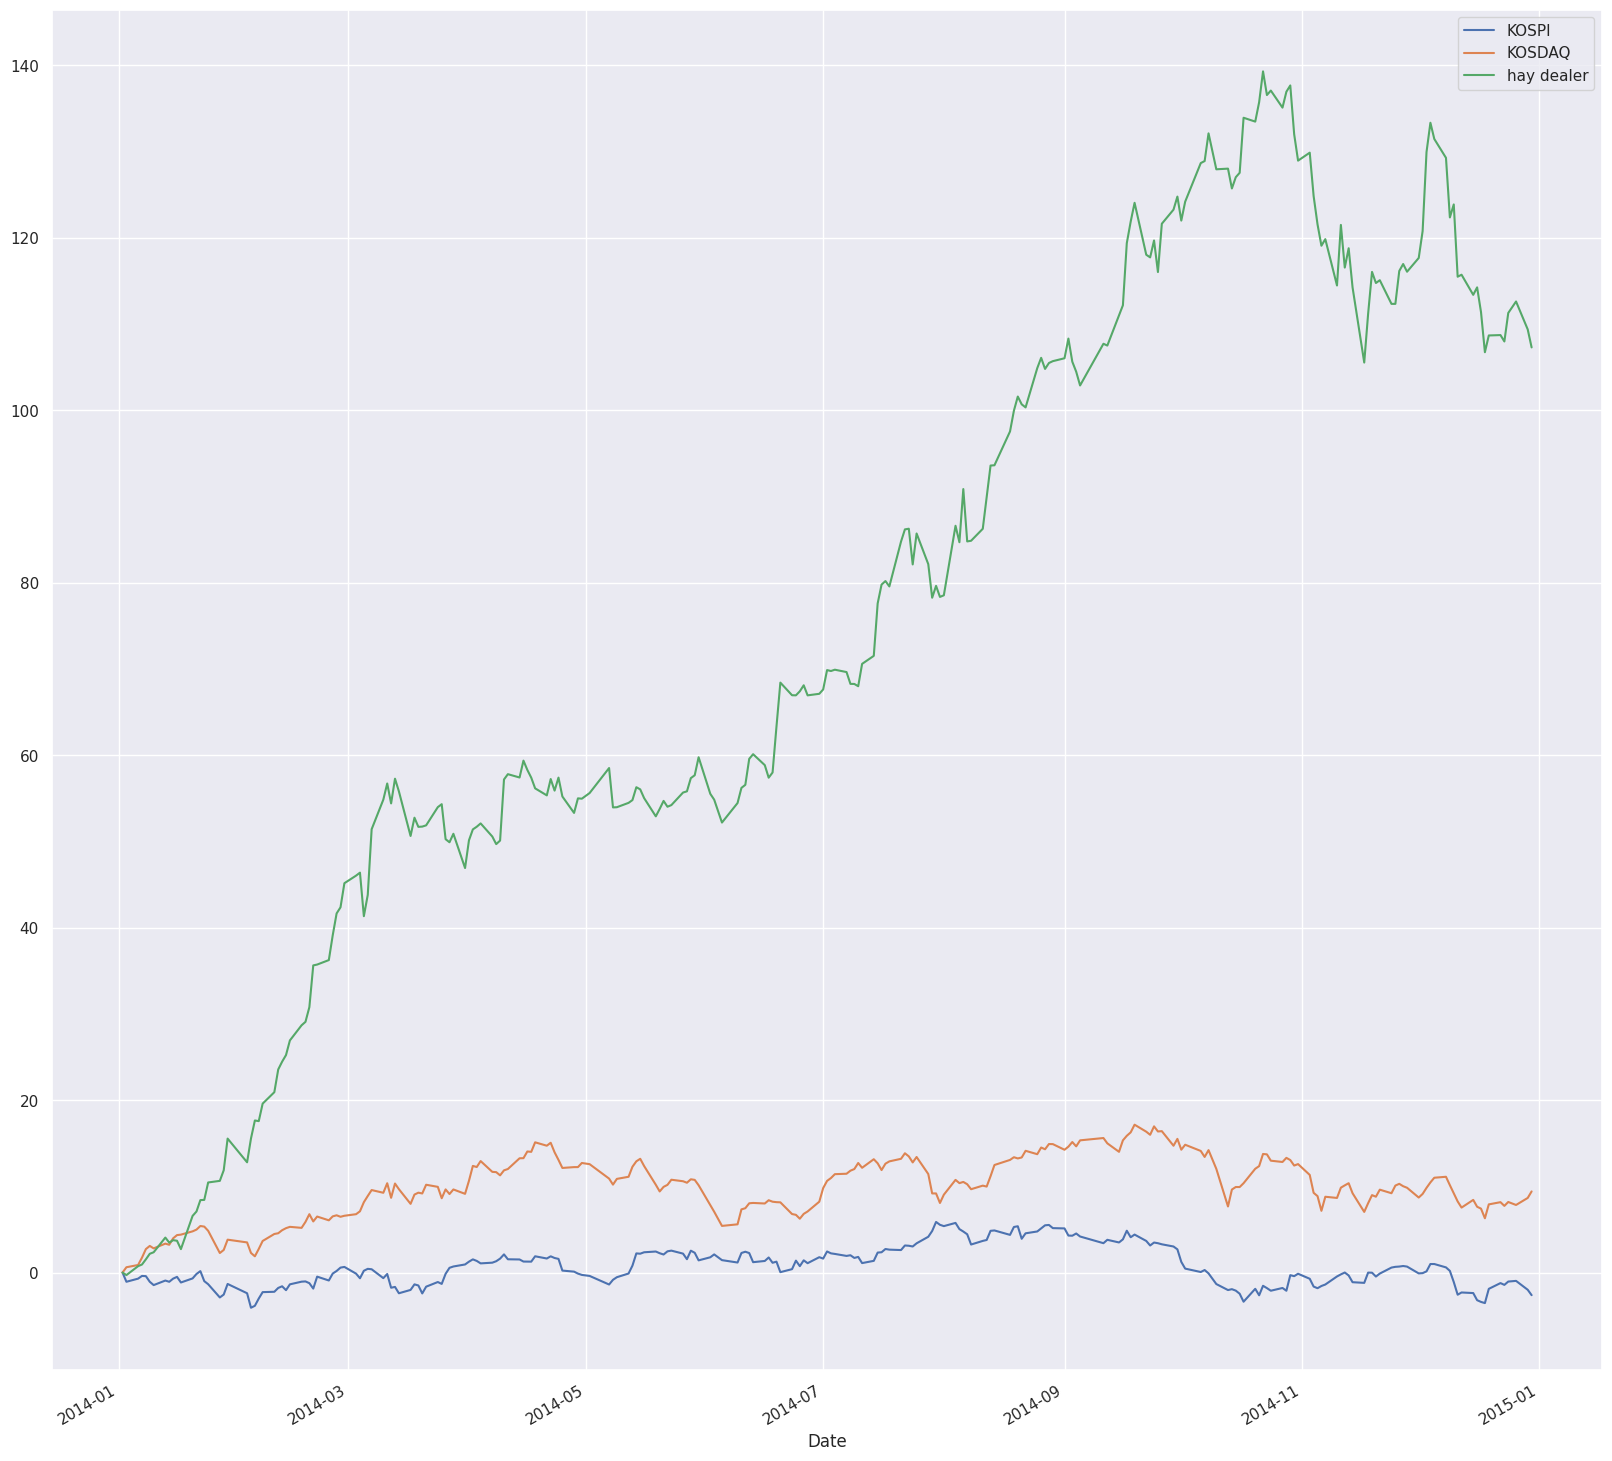

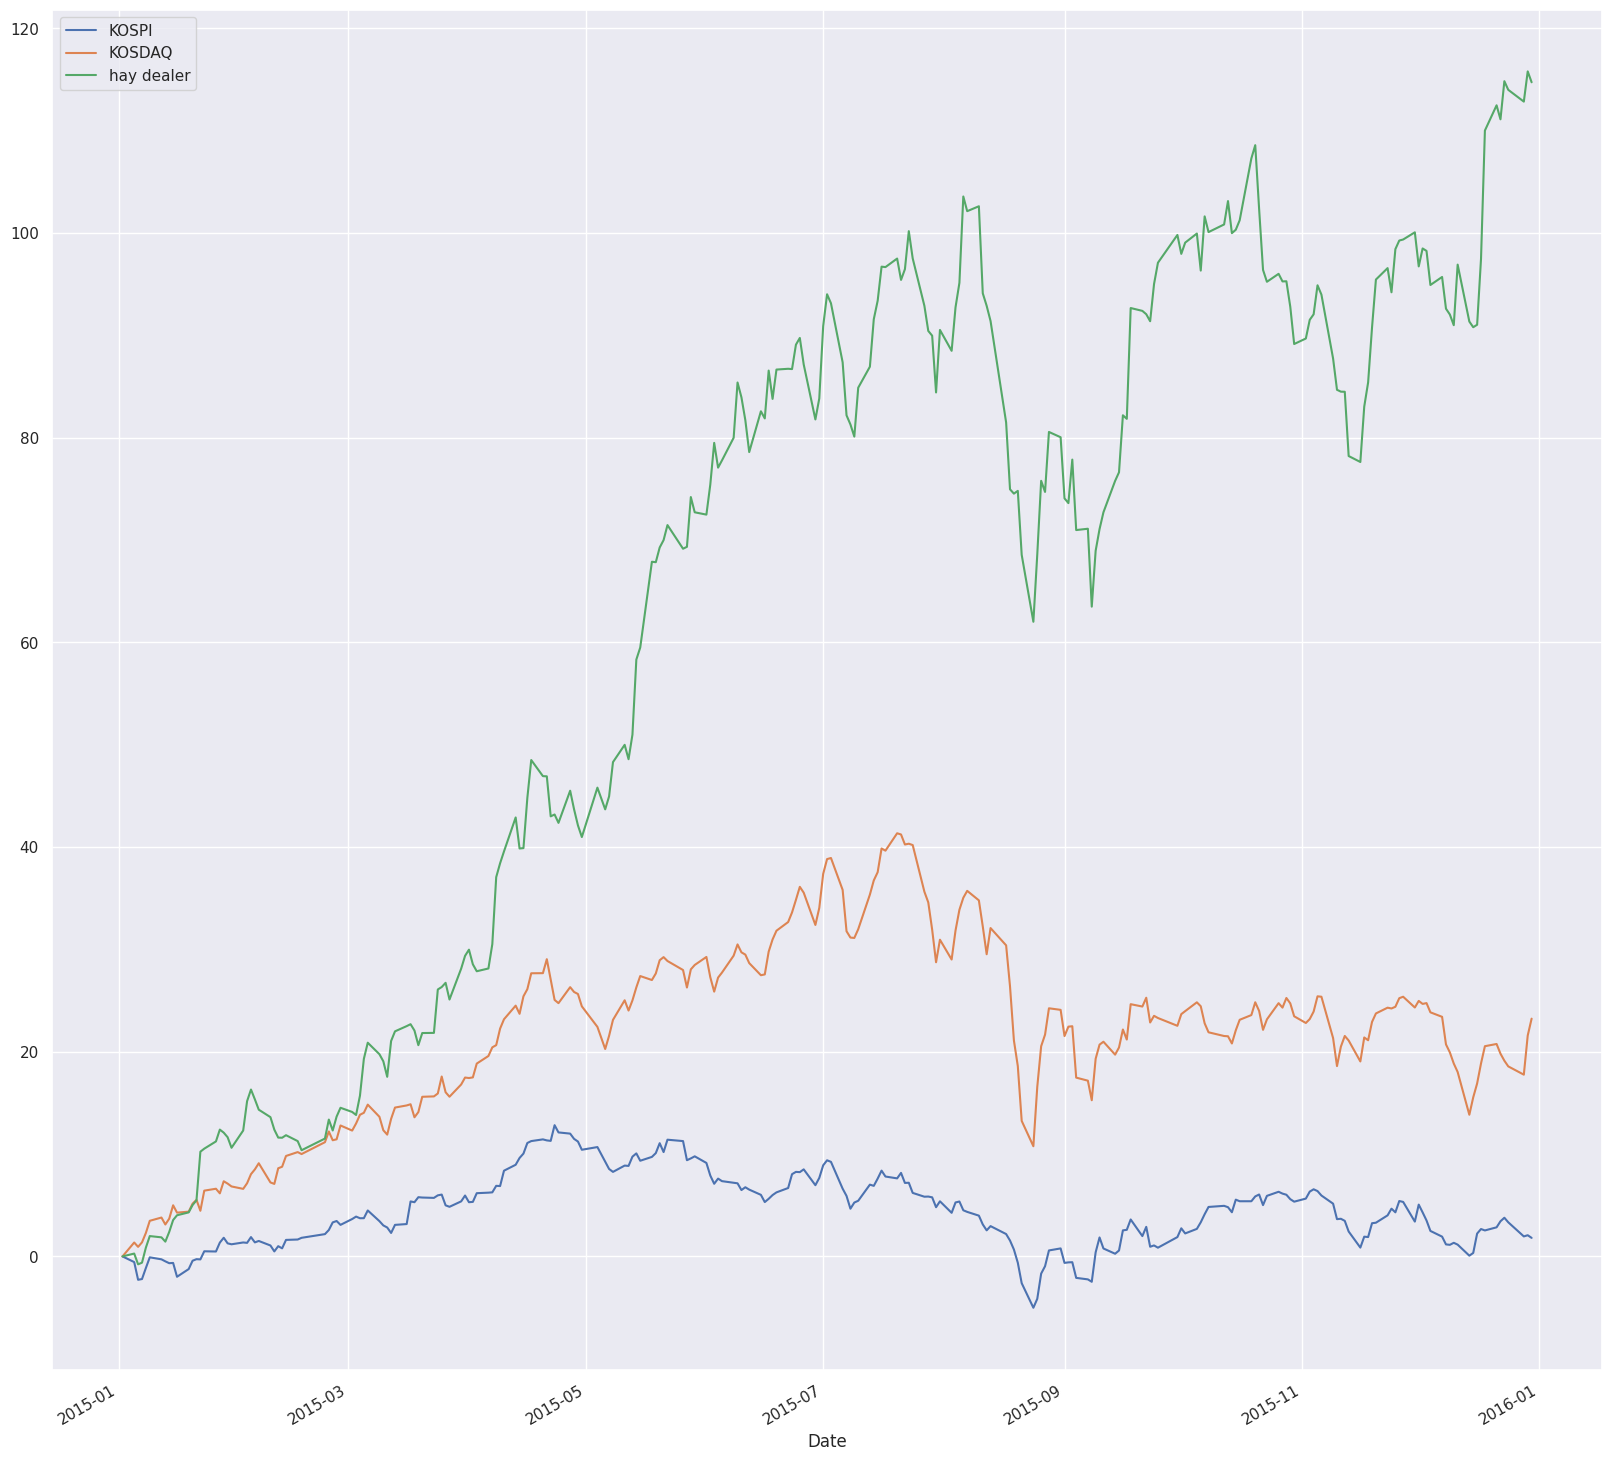

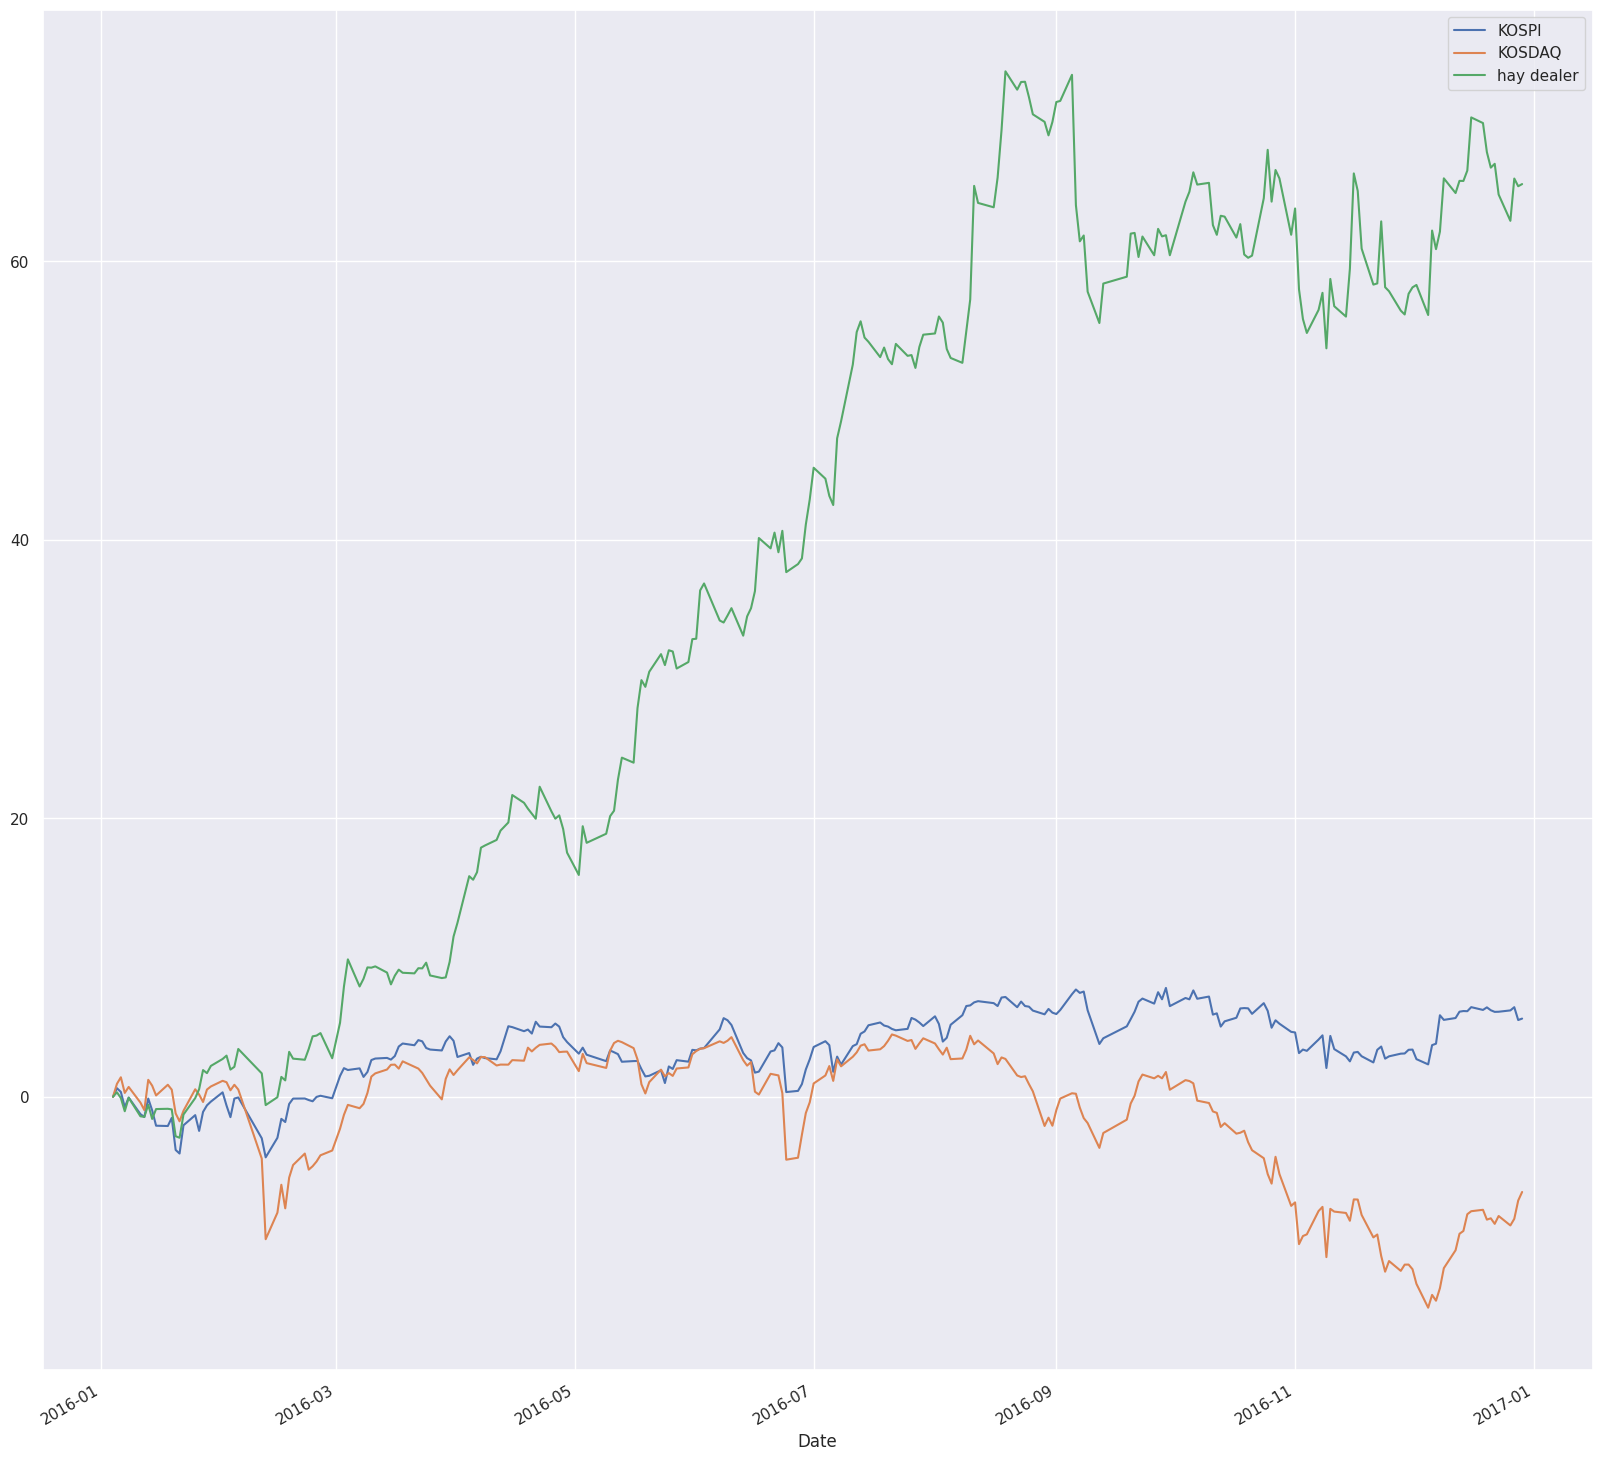

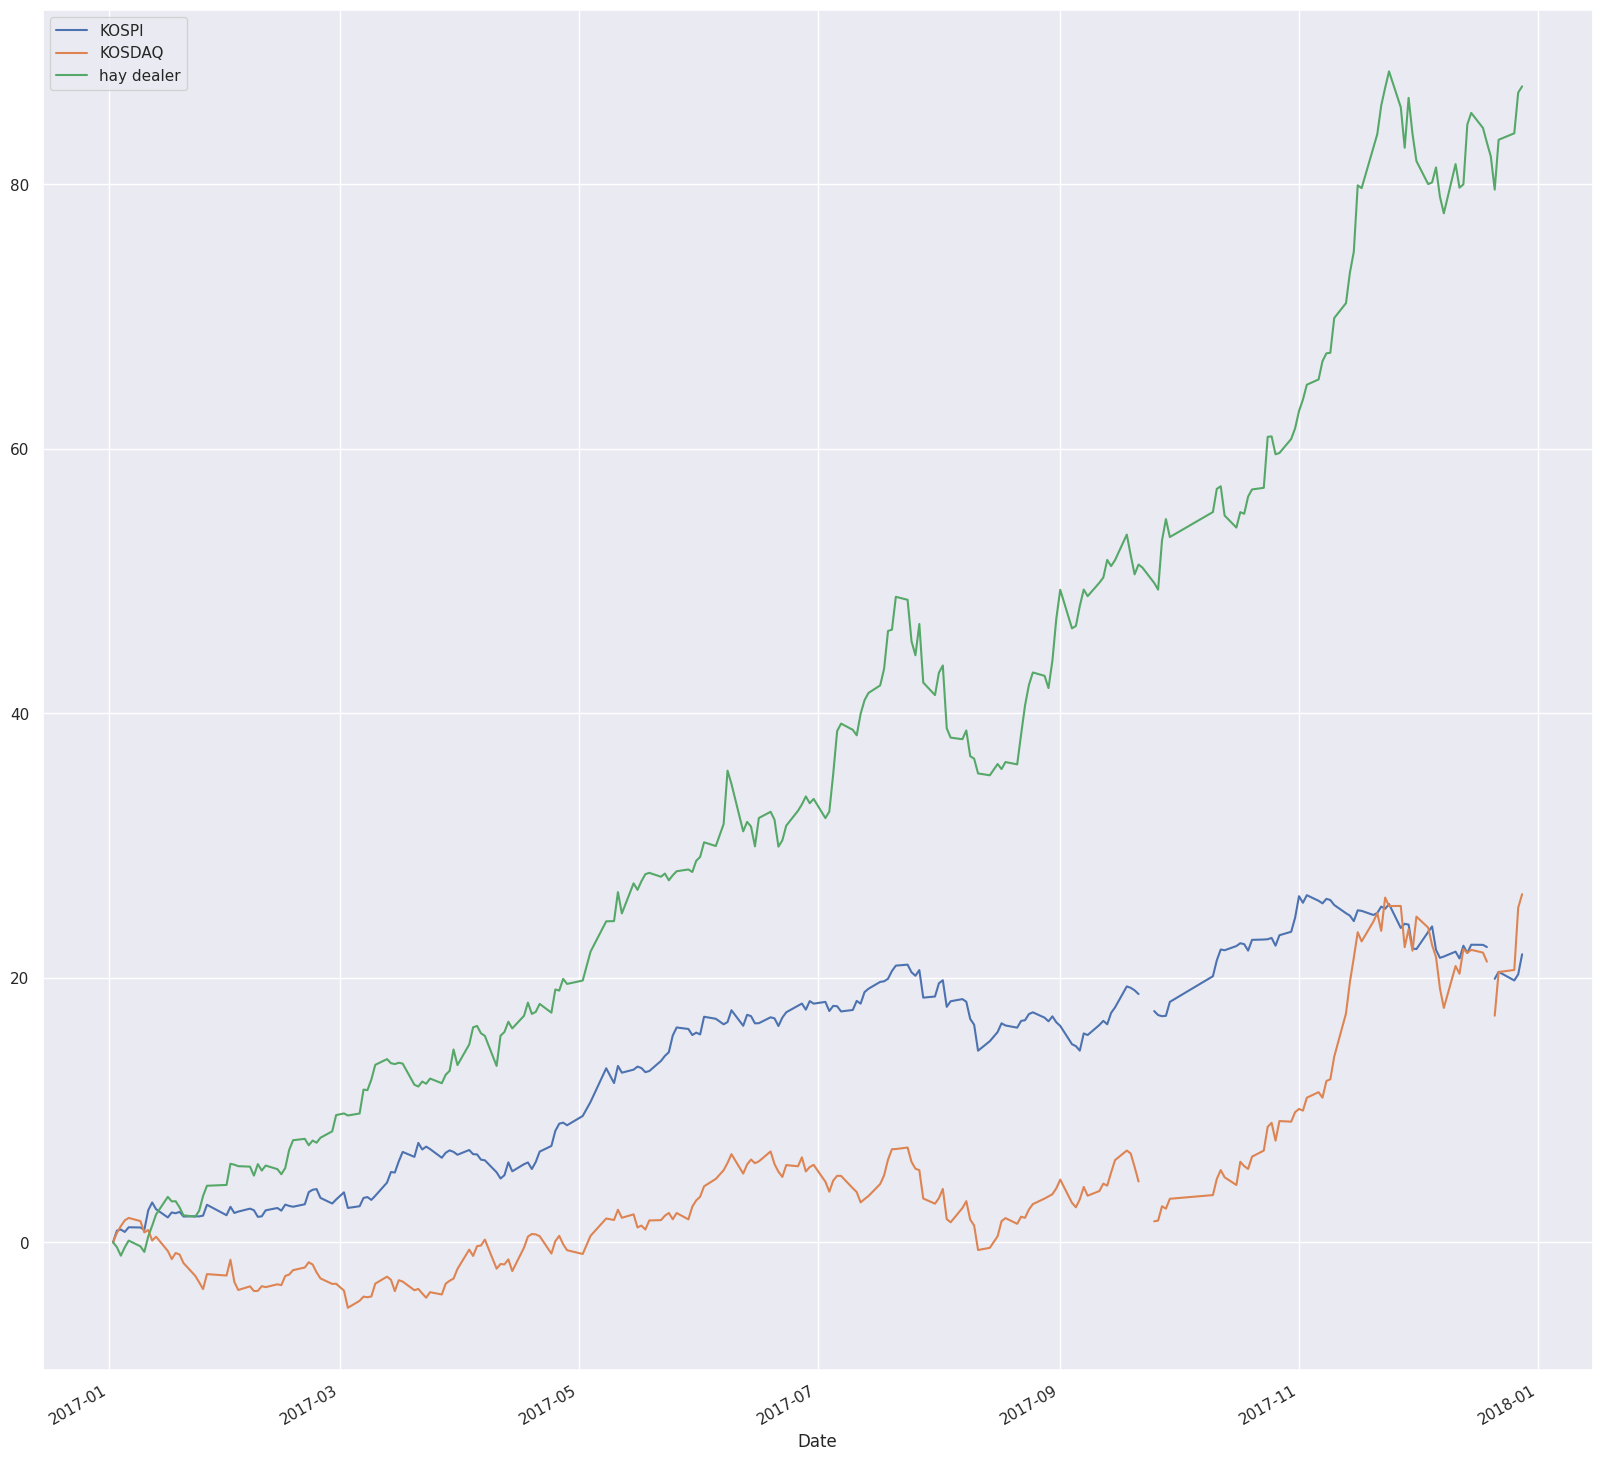

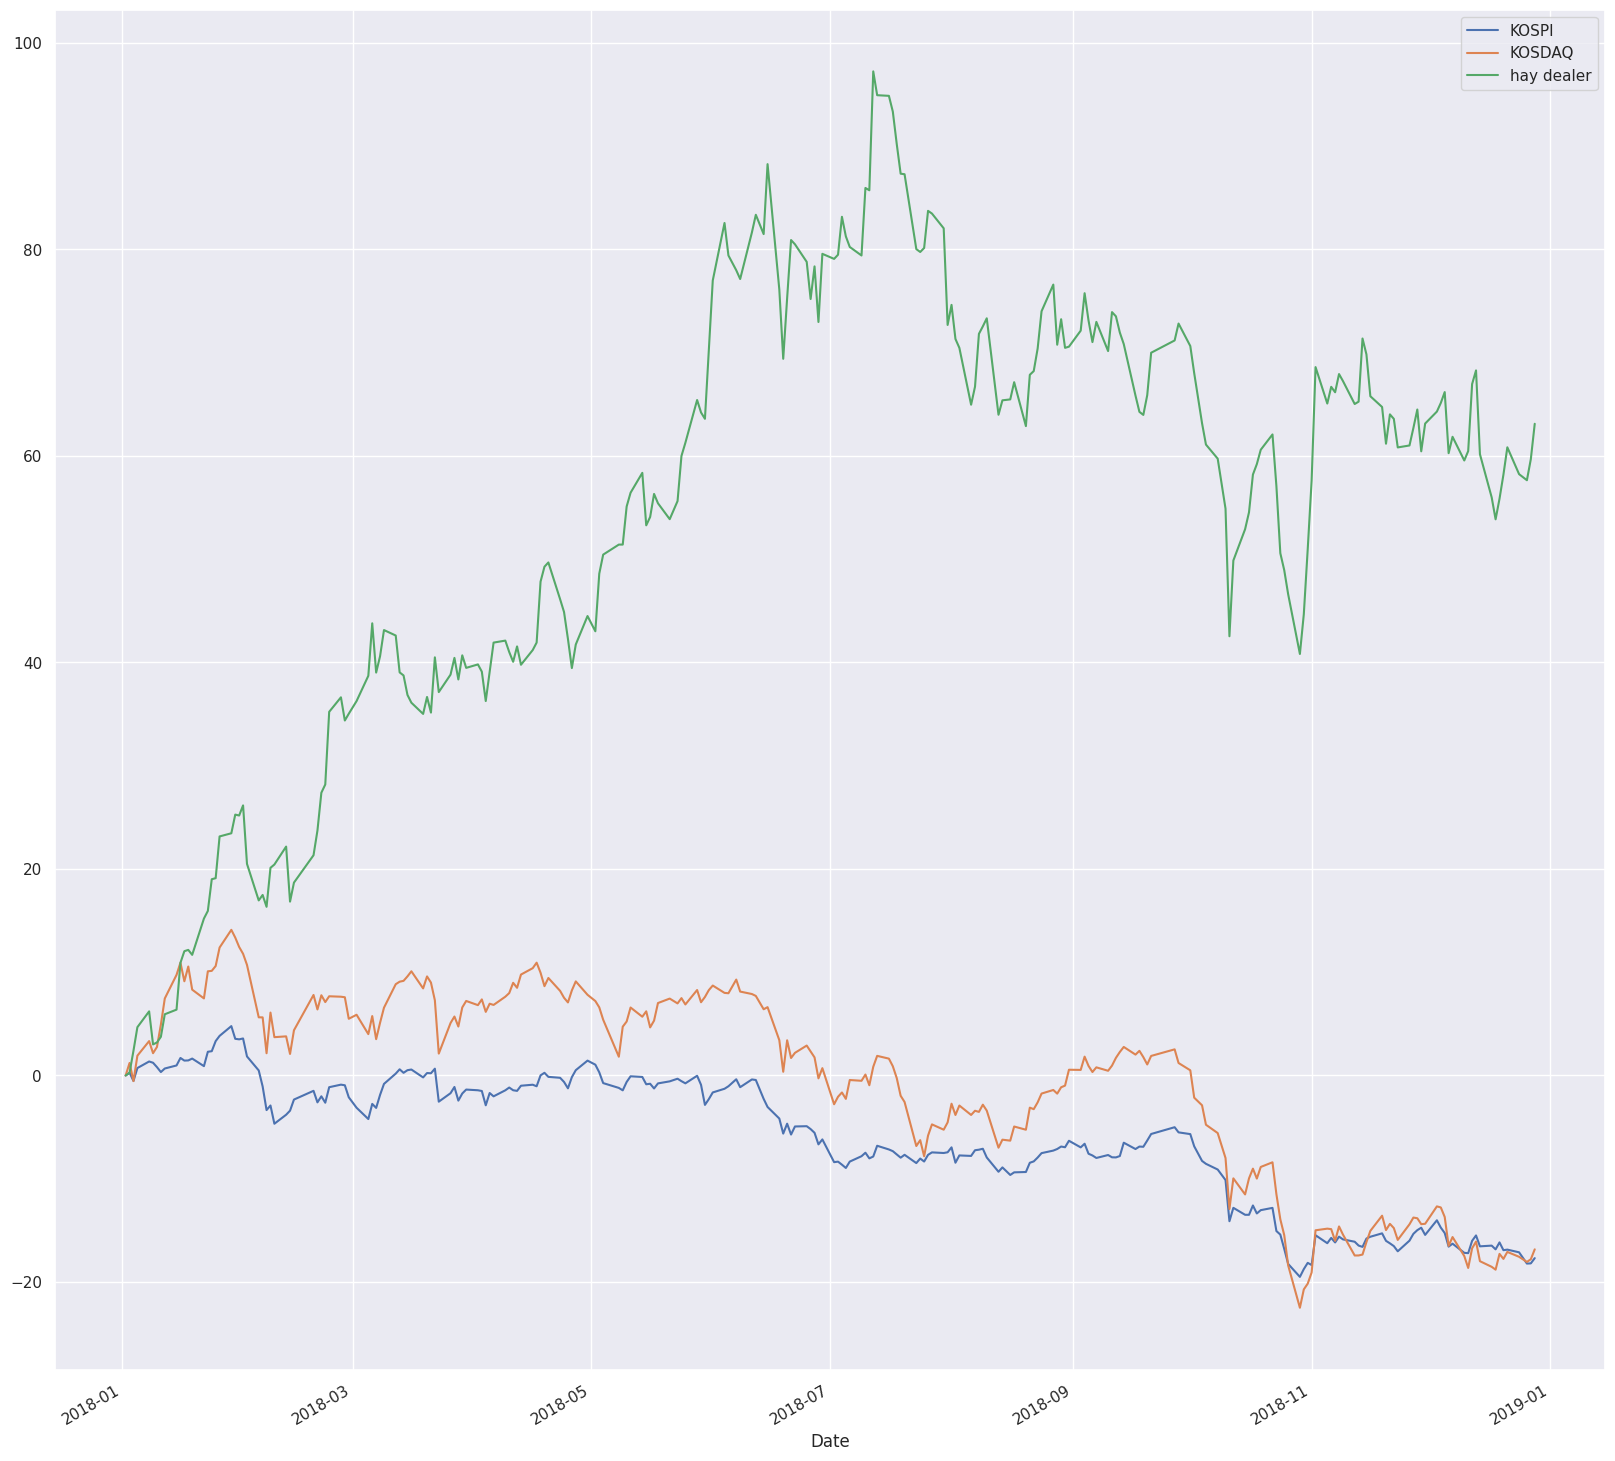

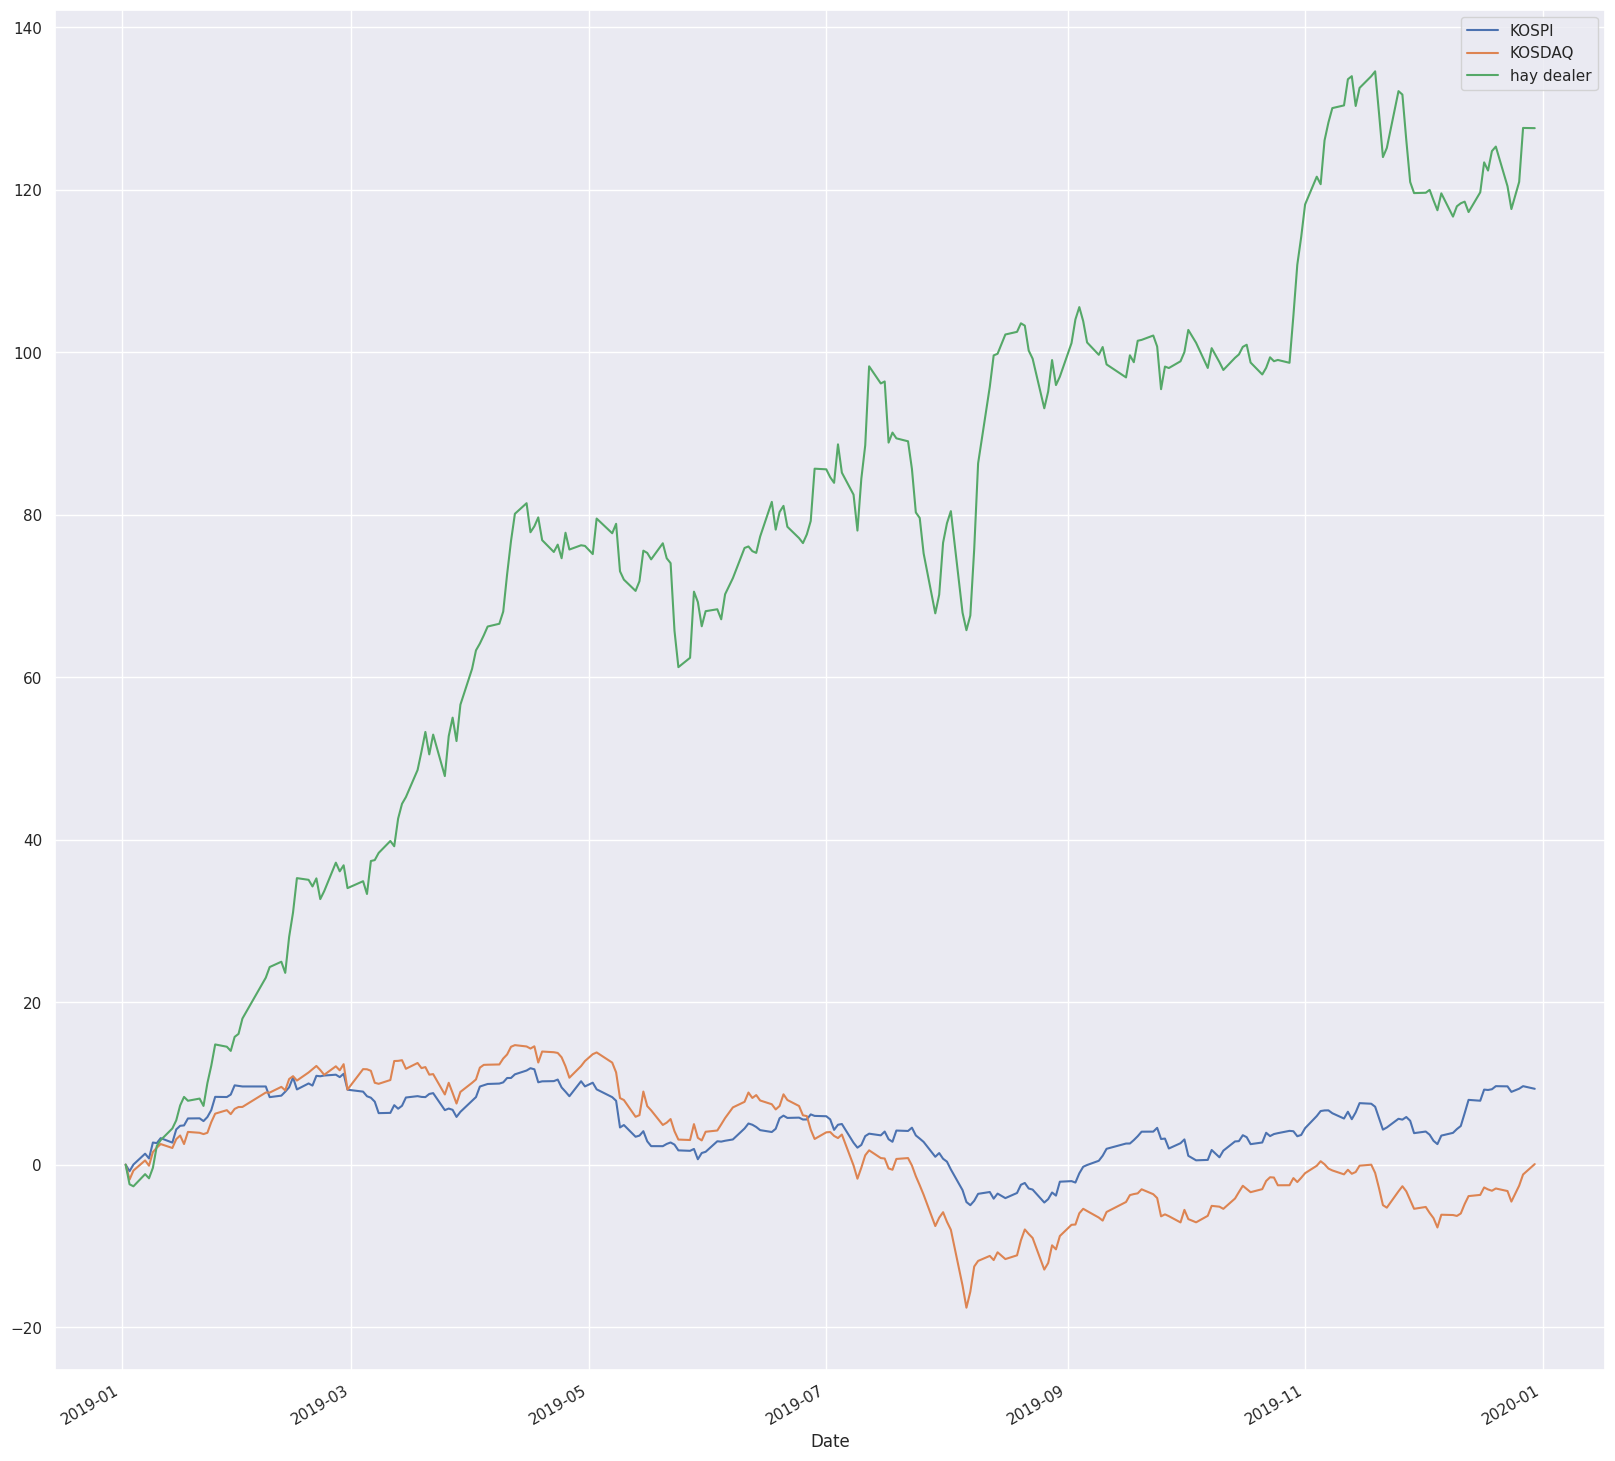

In [91]:
#수익률 시각화

plots=[]
benchmarkseason=[df_benchmark2014, df_benchmark2015, df_benchmark2016, df_benchmark2017, df_benchmark2018, df_benchmark2019]
investseason=[account_ret2014, account_ret2015, account_ret2016, account_ret2017, account_ret2018, account_ret2019]
benchmarklist=['KS11_ret', 'KQ11_ret']

for i, j in zip(benchmarkseason, investseason):
    df_plot = pd.concat([i, j], axis=1)
    plots.append(df_plot.plot(y=benchmarklist+["ret"], figsize=[20,20], grid=True))
    plt.legend(['KOSPI', 'KOSDAQ', 'hay dealer'])


In [92]:

#샤프비율 출력
benchmarkseason = [df_benchmark2014, df_benchmark2015, df_benchmark2016, df_benchmark2017, df_benchmark2018, df_benchmark2019]
investseason = [account_ret2014, account_ret2015, account_ret2016, account_ret2017, account_ret2018, account_ret2019]
benchmarklist = ['KS11_ret', 'KQ11_ret']
sharpe = []

for i, j in zip(benchmarkseason, investseason):
    df_ret = pd.concat([i, j], axis=1)
    rets = df_ret[benchmarklist+['ret']]
    sharpe_ratio = pf.timeseries.sharpe_ratio(rets,risk_free=2)
    sharpe.append(sharpe_ratio)
index=[2014,2015,2016,2017,2018,2019]
df_sharpe = pd.DataFrame(sharpe, columns=['KOSPI','KOSDAQ','hay dealer'], index=index)



In [93]:
df_sharpe

,KOSPI,KOSDAQ,hay dealer
2014,-8.617180,35.183456,30.537864
2015,10.855991,34.844501,29.052775
2016,9.493335,-10.239878,23.352594
2017,24.458724,5.500437,21.794497
2018,-20.850856,-4.623556,38.260623
2019,11.198815,-0.130112,34.610505


|index|KOSPI|KOSDAQ|hay dealer|
|---|---|---|---|
|2014|-8\.617179885901265|35\.183456375657826|30\.537864187047393|
|2015|10\.855990835612404|34\.84450051818012|31\.12420783896929|
|2016|9\.493335351959962|-10\.23987794725279|23\.352594088923507|
|2017|24\.458723875771476|5\.500437042528096|21\.849000973822687|
|2018|-20\.850856379102453|-4\.623556024961658|38\.26062277658528|
|2019|11\.198814603061777|-0\.13011198576456823|34\.091020337501654|